<a href="https://colab.research.google.com/github/siddharthapramanik771/CNN-based-classification-architecture-for-classifying-images/blob/main/CNN_based_classification_architecture_for_classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

import numpy as np
import pandas as pd
from PIL import Image
from numpy import asarray
import random
from matplotlib import pyplot as plt
import seaborn as sns
import random
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD,Adam
#from keras.datasets import mnist

In [5]:
path = 'charts'

In [6]:
def get_image_data(path,color_type='RGB'):
  img = Image.open(path)
  img = img.convert(color_type)
  data = asarray(img)
  return data/255

In [7]:
img_source = pd.read_csv(path+'/train_val.csv')

In [8]:
img_source = img_source.to_dict('records')

In [9]:
import copy
type_list = []
source = copy.deepcopy(img_source)
for i in source:
  # if i['image_index']%100 == 0: print(i['image_index'])
  i['image_data'] = get_image_data(path+'/train_val/'+str(i['image_index'])+'.png','LA')
  if i['type'] in type_list:
    i['type'] = type_list.index(i['type'])
  else:
    print(i['type'])
    type_list.append(i['type'])
    i['type'] = len(type_list)-1  

vbar_categorical
hbar_categorical
line
pie
dot_line


In [10]:
random.shuffle(source)

In [11]:
type_list

['vbar_categorical', 'hbar_categorical', 'line', 'pie', 'dot_line']

In [12]:
data = pd.DataFrame(source)

In [13]:
X = np.array([i['image_data'] for i in source])
Y = np.array([i['type'] for i in source])
X_train = X[:800]
X_val = X[800:]
Y_train = Y[:800]
Y_val = Y[800:]
# Y = to_categorical(Y)

In [14]:
X_train.shape

(800, 128, 128, 2)

In [28]:
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,2)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = cnn_model.fit(X_train, Y_train, batch_size=500, epochs=100,validation_data=(X_val, Y_val),callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 4s 2s/step - loss: 1.8243 - accuracy: 0.2138 - val_loss: 2.7937 - val_accuracy: 0.1850
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 2.3132 - accuracy: 0.2138 - val_loss: 1.6354 - val_accuracy: 0.2750
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 1.6766 - accuracy: 0.2237 - val_loss: 1.6235 - val_accuracy: 0.2500
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 1.6411 - accuracy: 0.1875 - val_loss: 1.5965 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 1.6027 - accuracy: 0.3050 - val_loss: 1.5937 - val_accuracy: 0.5250
Epoch 6/100
2/2 [==============================] - 4s 1s/step - loss: 1.5901 - accuracy: 0.4675 - val_loss: 1.5998 - val_accuracy: 0.2450
Epoch 7/100
2/2 [==============================] - 4s 1s/step - loss: 1.5847 - accuracy: 0.2675 - val_loss: 1.5877 - val_accuracy: 0.2500
Epoch 8/100
2/2 [=================

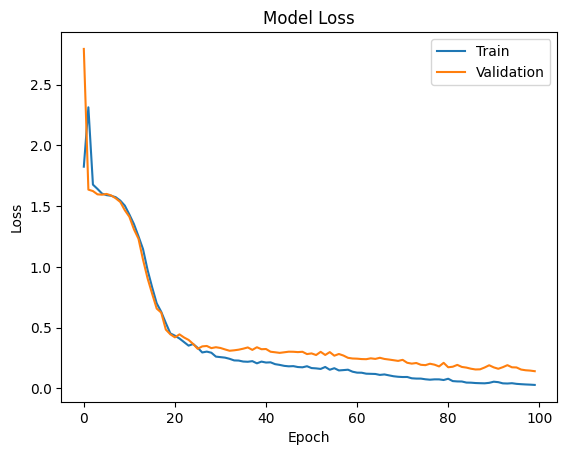

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

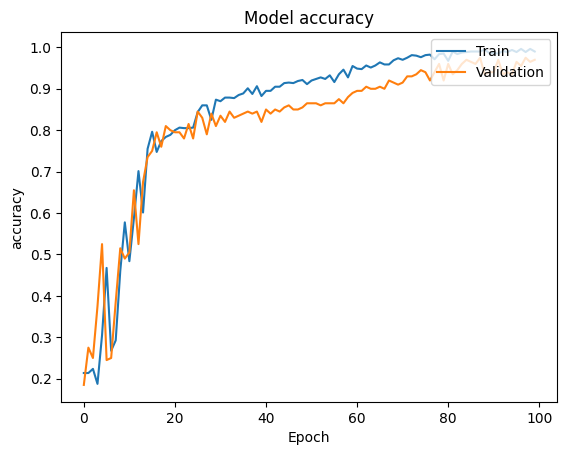

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
cnn_model.evaluate(X_val,Y_val)

7/7 [==============================] - 0s 34ms/step - loss: 0.1406 - accuracy: 0.9700


[0.1406293511390686, 0.9700000286102295]

In [33]:
X_test = {(path+'/test/'+i):get_image_data(path+'/test/'+i,'LA') for i in os.listdir(path+'/test')}

In [34]:
def get_prediction(x):
  y = cnn_model.predict(np.array([x]))
  y = [np.argmax(element) for element in y]
  return type_list[y[0]]

1/1 [==============================] - 0s 27ms/step


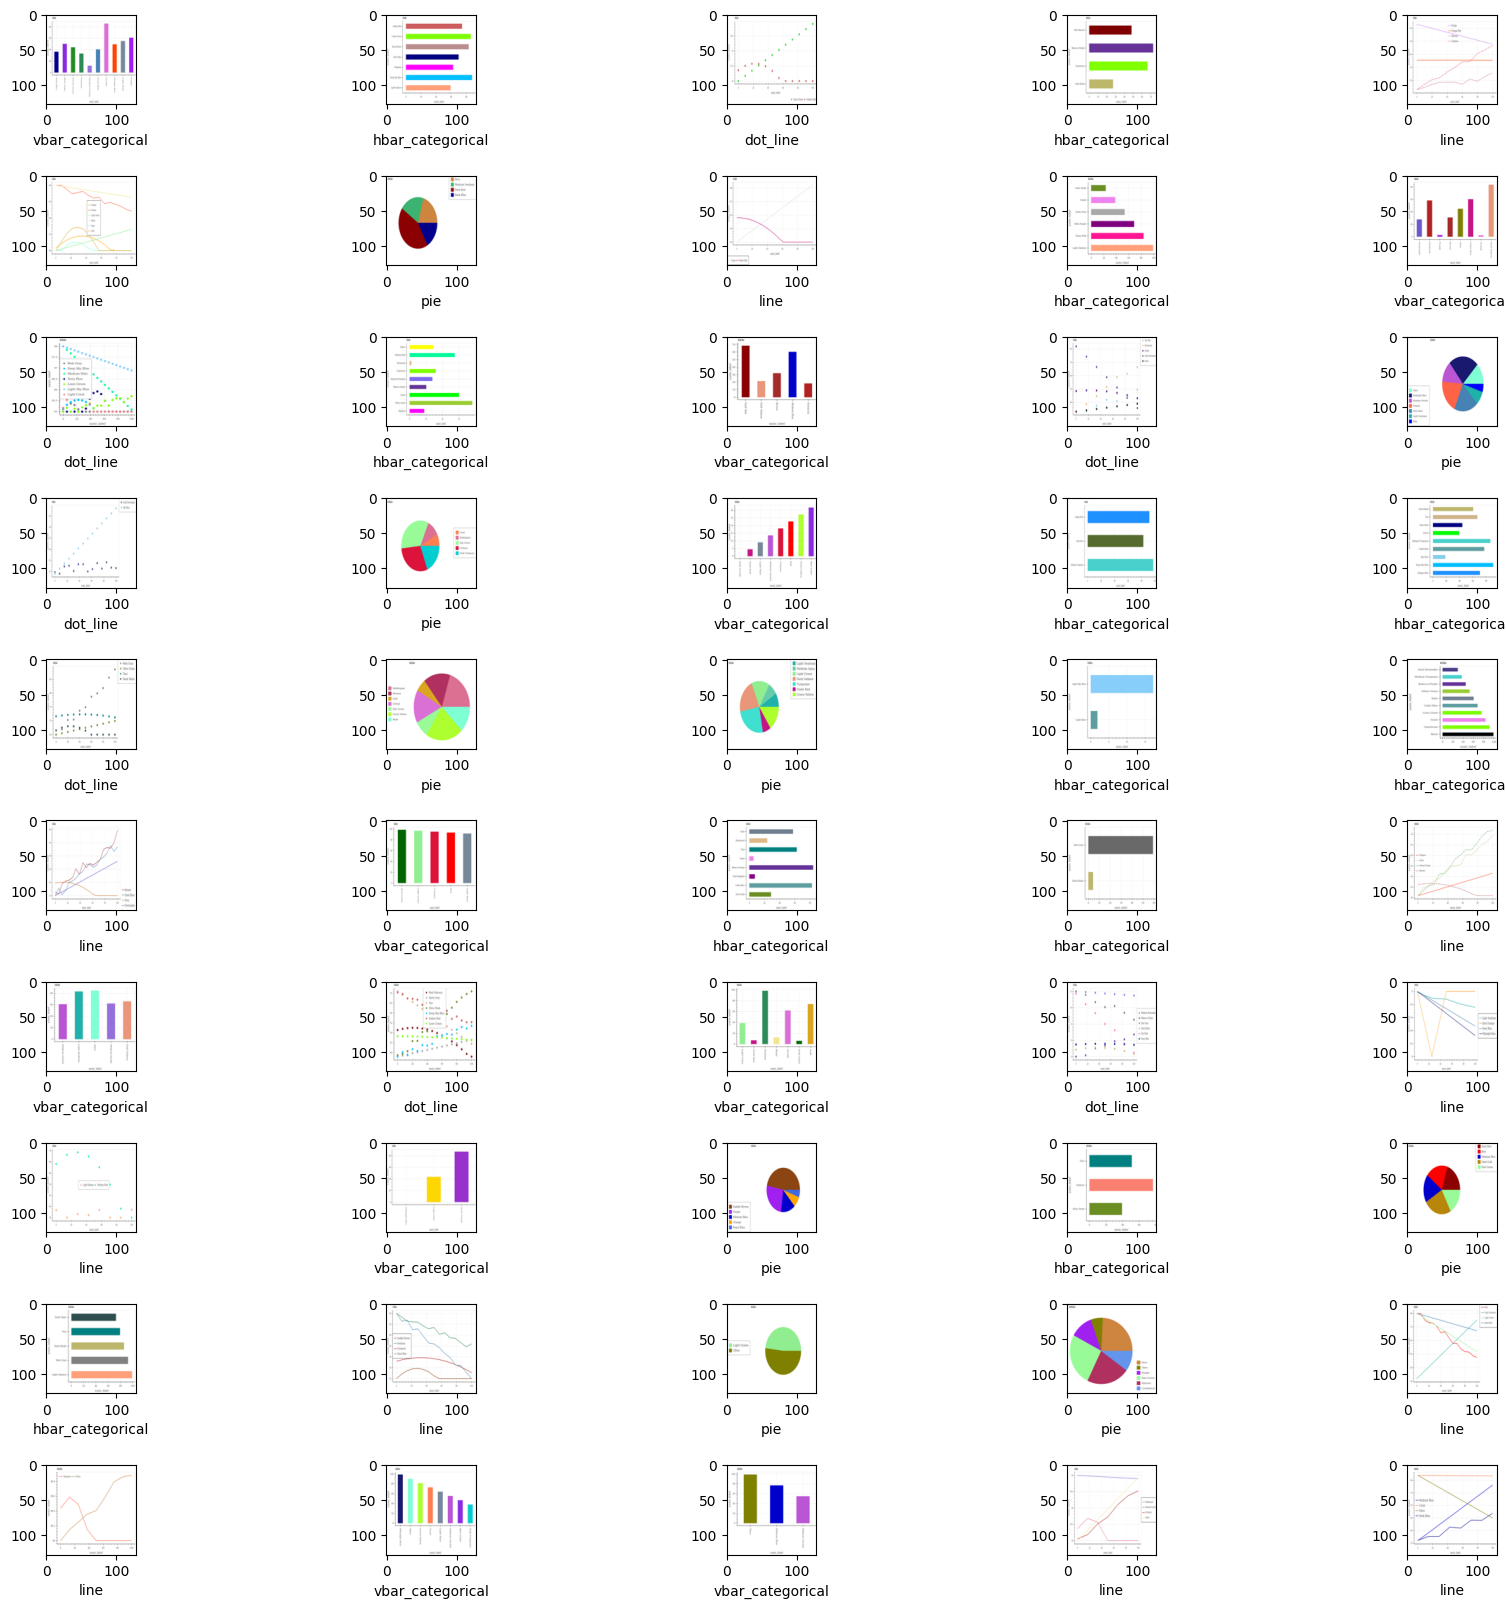

In [47]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.subplots_adjust(wspace=0.8, hspace=0.8)
for n,i in enumerate(list(X_test.keys())[:50]):
  img = Image.open(i)
  # plt.rcParams['figure.figsize'] = [20, 20]
  # plt.subplots_adjust(wspace=0.8, hspace=0.8)
  plt.subplot(10,5,n+1)
  plt.imshow(img)
  plt.xlabel(get_prediction(X_test[i]))
plt.show()

In [48]:
cnn_model.save('cnn_model.h5')